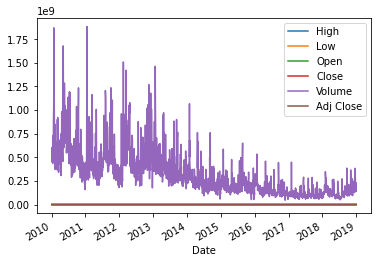

In [1]:
import pandas as pd
import datetime
import pandas_datareader.data as web
from pandas import Series, DataFrame
import numpy as np
import matplotlib.pyplot as plt
import time
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import SimpleRNN
from keras.layers import GRU

start = datetime.datetime(2010, 1, 1)                #read Google and apple data
end = datetime.datetime(2019, 1, 1)
dataset = web.DataReader("AAPL", 'yahoo', start, end)
dataset2 = web.DataReader("GOOG", 'yahoo', start, end)
dataset["Close"] = dataset["Close"].replace(',', '').astype(float)
dataset2["Close"] = dataset2["Close"].replace(',', '').astype(float)
dataset.plot()

In [ ]:
training_set1=dataset['Close']
training_set1=pd.DataFrame(training_set1)

r=0.1
a=int ( len(training_set1)*(1-r))           #make 0.1 of data test set(apple)
b=len(training_set1)
print(a,b,a==b)
training_set=training_set1[0:a]  
text_set=training_set1[a:b]
print(len(text_set))
print(len(training_set))

x=np.array(text_set)                      #save test set with no normalization

2037 2264 False
227
2037


In [ ]:
training_set2=dataset2['Close']
training_set2=pd.DataFrame(training_set2)

r=0.1
a=int ( len(training_set2)*(1-r))      #make 0.1 of data test set(google)
b=len(training_set2)
print(a,b,a==b)
training_setX=training_set2[0:a]
text_setX=training_set2[a:b]
print(len(text_setX))
print(len(training_setX))

x1=np.array(text_setX)

2037 2264 False
227
2037


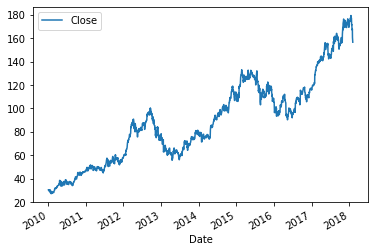

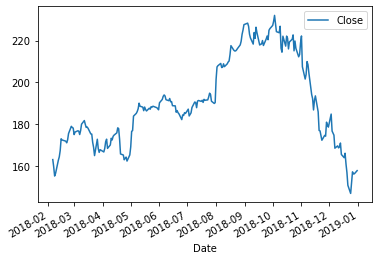

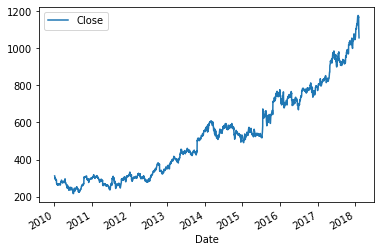

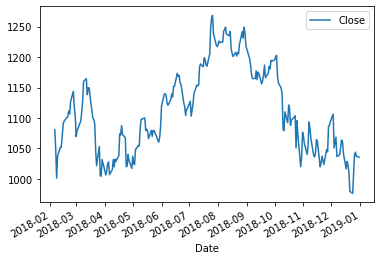

In [ ]:
training_set.plot( )
text_set.plot()

training_setX.plot( )
text_setX.plot()

In [ ]:

from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))       # Feature Scaling for apple
training_set_scaled = sc.fit_transform(training_set)
text_set_scaled = sc.transform(text_set)

print(len(training_set_scaled))
print(len(training_set))

2037
2037


In [ ]:
scX = MinMaxScaler(feature_range = (0, 1))       # Feature Scaling for google
training_set_scaledX = scX.fit_transform(training_setX)
text_set_scaledX = scX.transform(text_setX)

# print(training_set_scaledX)
print(len(training_setX))

2037


In [ ]:
X_train = []                                # Creating  train dataset with 30 timesteps and 1 output 
y_train = []
r=0.1
a=int ( len(training_set)*(1-r))
b=len(training_set)
day=30
train=[]
test=[]
for i in range(day, b):                                                   
    train=training_set_scaled[i-day:i, 0]                           #create "data" set from apple data                                           
    train=np.column_stack((train,training_set_scaledX[i-day:i, 0]))#add google data to "data" set
    X_train.append(train)

    test=[]
    test.append(training_set_scaled[i, 0])                          #add apple data to LABELS 
    test.append(training_set_scaledX[i, 0])                          #add google data to LABELS
    y_train.append(test)
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 2))


textX = []                                                          # Creating  TEST dataset with 30 timesteps and 1 output 
textY = []
text_y=[]
train=[]
test=[]
a=int ( len(text_set)*(1-r))
b=len(text_set)
for i in range(day, b):                                             
    train=text_set_scaled[i-day:i, 0]                                #create "data" set from apple data 
    train=np.column_stack((train,text_set_scaledX[i-day:i, 0]))      #add google data to "data" set
    textX.append(train)
    test=[]
    test.append(text_set_scaled[i, 0])                               #add apple data to LABELS 
    test.append(text_set_scaledX[i, 0])                              #add google data to LABELS
    text_y.append(test)
    test=[]
    test.append(x[i])                                                #add apple labels with no normalization 
    test.append(x1[i])                                               #add google labels with no normalization 
    textY.append(test)


textX, textY ,text_y = np.array(textX), np.array(textY), np.array(text_y)
textX = np.reshape(textX, (textX.shape[0], textX.shape[1], 2))        # Reshaping

In [ ]:
def drawTrainTrend(h):
  plt.plot(h.history['mean_squared_error'], label='mean_squared_error (training data)')
  plt.plot(h.history['val_mean_squared_error'], label='mean_squared_error (test data)')
  # plt.title('train')
  plt.ylabel('mean_squared_error value')
  plt.xlabel('No. epoch')
  plt.legend(loc="upper left")
  plt.show()

  plt.plot(h.history['mean_absolute_percentage_error'], label='mean_absolute_percentage_error (training data)')
  plt.plot(h.history['val_mean_absolute_percentage_error'], label='mean_absolute_percentage_error (test data)')
  # plt.title('train')
  plt.ylabel('mean_absolute_percentage_error value')
  plt.xlabel('No. epoch')
  plt.legend(loc="upper left")
  plt.show()

In [ ]:
def drawTestResults(real_stock_price,predicted_stock_price):
  
  predicted_stock_price1 = sc.inverse_transform(predicted_stock_price) # reverse apple data normalization
  predicted_stock_priceX=scX.inverse_transform(predicted_stock_price) # reverse google data normalization
  predicted_stock_price1=pd.DataFrame(predicted_stock_price1)
  predicted_stock_priceX=pd.DataFrame(predicted_stock_priceX)

  real_stock_price = np.reshape(real_stock_price, (real_stock_price.shape[0], real_stock_price.shape[1]))
  real_stock_price=pd.DataFrame(real_stock_price)

  plt.plot(real_stock_price[1], color = 'red', label = 'Real Google Stock Price')
  plt.plot(predicted_stock_priceX[1], color = 'blue', label = 'Predicted Google Stock Price')
  plt.title('Google Stock Price Prediction')
  plt.xlabel('Time')
  plt.ylabel('Google Stock Price')
  plt.legend()
  plt.show()

  plt.plot(predicted_stock_price1[0], color = 'blue', label = 'Predicted APPLE Stock Price')
  plt.plot(real_stock_price[0], color = 'red', label = 'Real Google Stock Price')
  plt.title('APPLE Stock Price Prediction')
  plt.xlabel('Time')
  plt.ylabel('APPLE Stock Price')
  plt.legend()
  plt.show()


In [ ]:
X_train.shape

(2007, 30, 2)

In [ ]:
def test(CellType,hasDrop,costFunction,optimization):  # create a rnn with cellType(GRU,LSTM,simpleRNN) and test
  regressor = Sequential()
  regressor.add(CellType(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 2)))
  if(hasDrop):
    regressor.add(Dropout(0.2))
  regressor.add(CellType(units = 50, return_sequences = True))
  if(hasDrop):
    regressor.add(Dropout(0.2))

  regressor.add(CellType(units = 50, return_sequences = True))
  if(hasDrop):
    regressor.add(Dropout(0.2))

  regressor.add(CellType(units = 50))
  if(hasDrop):
    regressor.add(Dropout(0.2))

  regressor.add(Dense(units = 2))

  regressor.compile(optimizer = optimization, loss = costFunction ,metrics=['accuracy',"mean_squared_error","mean_absolute_percentage_error"])

  start = time.time()

  h=regressor.fit(X_train, y_train, epochs = 100, batch_size = 32,validation_data=(textX,text_y),verbose=True) #train
  end = time.time()
  print(end - start)
  drawTrainTrend(h)

  X_test = np.array(textX)
  X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 2))
  predicted_stock_price = regressor.predict(X_test)                                                             #test
  drawTestResults(textY,predicted_stock_price)  


In [ ]:
test(LSTM,True,'mean_squared_error','adam')

In [ ]:
test(GRU,True,'mean_squared_error','adam')

In [ ]:
test(SimpleRNN,True,'mean_squared_error','adam')

In [ ]:
test(GRU,True,'mean_squared_error','Adagrad')

In [ ]:
test(GRU,True,'mean_squared_error','RMSprop')

In [ ]:
test(GRU,False,'mean_squared_error','adam')

In [ ]:
test(GRU,False,'mean_squared_error','Adagrad')

In [ ]:
test(GRU,False,'mean_squared_error','RMSprop')

In [ ]:
test(GRU,True,'mean_absolute_percentage_error','adam')